In [1]:
import numpy as np
import torch as th
from tqdm.notebook import tqdm 
from torch.distributions.uniform import Uniform
import matplotlib.pyplot as plt

from active_learning import SNLE_ensemble

In [2]:
# define parameters for training 
training_parameters = {
    'x_obs': th.Tensor([2]),
    'prior': Uniform(-8, 8),
    'n_rounds': 0,
    'n_emulators': 3,
    'train_size': 10000,
    'valid_size': 100,
    'train_batch_size': 50,
    'train_n_epochs': 250,
    'al_n_samples': 50,
    'al_batch_size': 10,
    'al_n_epochs': 100,
    'lr': .01
}

ensemble, init_train_loss, al_train_loss, all_likelihoods = SNLE_ensemble(*training_parameters.values())

training initial ensemble...


100%|████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.44it/s]


initial training complete!

running active learning loop...


0it [00:00, ?it/s]


In [3]:
init_train_loss[0][0]

array([[1.00000000e+00, 4.64360920e+07, 5.98029200e+07],
       [2.00000000e+00, 5.07504320e+00, 1.55324256e+00],
       [3.00000000e+00, 5.06819105e+00, 1.35877264e+00],
       [4.00000000e+00, 5.06818199e+00, 1.38653767e+00],
       [5.00000000e+00, 5.06814957e+00, 1.39130580e+00],
       [6.00000000e+00, 5.06807661e+00, 1.32705224e+00],
       [7.00000000e+00, 5.06798172e+00, 1.30033219e+00],
       [8.00000000e+00, 5.06786633e+00, 1.39733434e+00],
       [9.00000000e+00, 5.06773329e+00, 1.37069476e+00],
       [1.00000000e+01, 5.06758118e+00, 1.32293320e+00],
       [1.10000000e+01, 5.06740904e+00, 1.38999319e+00],
       [1.20000000e+01, 5.06721115e+00, 1.42268693e+00],
       [1.30000000e+01, 5.06698227e+00, 1.42325461e+00],
       [1.40000000e+01, 5.06669140e+00, 1.40027916e+00],
       [1.50000000e+01, 5.06632566e+00, 1.35351431e+00],
       [1.60000000e+01, 5.06589127e+00, 1.65435696e+00],
       [1.70000000e+01, 5.06540728e+00, 1.36952209e+00],
       [1.80000000e+01, 5.06486

(0.0, 10.0)

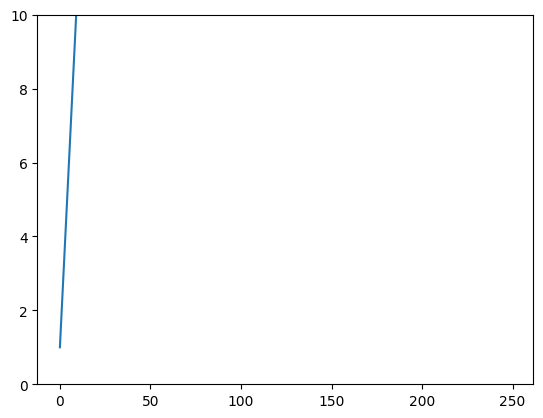

In [24]:
fig, ax = plt.subplots()

ax.plot(init_train_loss[0][0][:,0])
ax.set_ylim(0, 10)

In [17]:
def plot_loss(training_loss):
    fig, ax = plt.subplots(figsize=(6, 4))
    # plot training loss
    for e in training_loss:
        ax.plot(np.arange(1,len(e[0])+1), e[0], color='red', alpha=.2)

    ax.set_ylim((0, 10))

    plt.show()

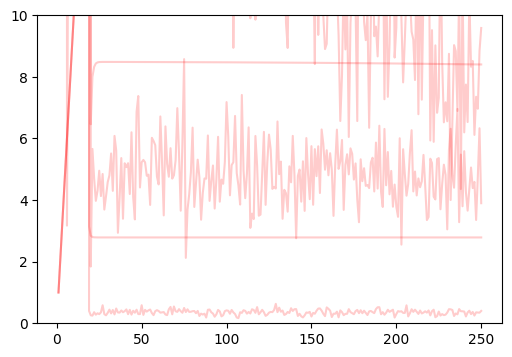

In [18]:
plot_loss(init_train_loss)